# TTP08

## Introduction

In this report, we are going to explore a dataset which store the hourly step counts of a participant for 9 months. Our purpose is to analyze the trends of the daily step within a week. Now, let's take a look at the row data.

## Dataset

The dataset collects the hourly step from participant 7 from 1st January to 13th September. We show the examples of data below.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
raw_df = pd.read_csv("Participant-07.csv")
df = raw_df.copy()
df.head()

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


## Data Cleaning

Out goal is to analyze the trends in a week, so we need to clean our data so that it could reflects on what we want.

In [102]:
new_df_date = df["Start"].str.split(" ",n = 1,expand = True)
df["Date"] = new_df_date[0]
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df['Date'].dt.day_name()
df = df.drop(columns = ["Start","Finish"]) #https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df = df.rename(columns = {"Steps (count)":"Steps"})

df.head()

,Steps,Date,Weekday
0,32.0,2022-01-01,Saturday
1,0.0,2022-01-01,Saturday
2,0.0,2022-01-01,Saturday
3,0.0,2022-01-01,Saturday
4,0.0,2022-01-01,Saturday


## Statistics of The Dataset

We will next provide some statistics of the dataset

In [107]:
outcome_1 = df[["Weekday","Steps"]].groupby("Weekday").sum()
week_dict = {'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
outcome_1["Steps"] = outcome_1["Steps"].round() # remove the digit in the steps
outcome_1 = outcome_1.sort_values("Weekday", key = lambda x : x.apply (lambda x : week_dict[x]))
print(outcome_1)

              Steps
Weekday            
Monday     320383.0
Tuesday    286323.0
Wednesday  284938.0
Thursday   294583.0
Friday     253461.0
Saturday   306291.0
Sunday     237623.0


The table above shows the total steps for each weekday, we generate a list in decreasing order below.

In [104]:
outcome_2 = outcome_1.sort_values(by = "Steps",ascending=False)
print(outcome_2)


              Steps
Weekday            
Monday     320383.0
Saturday   306291.0
Thursday   294583.0
Tuesday    286323.0
Wednesday  284938.0
Friday     253461.0
Sunday     237623.0


## Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


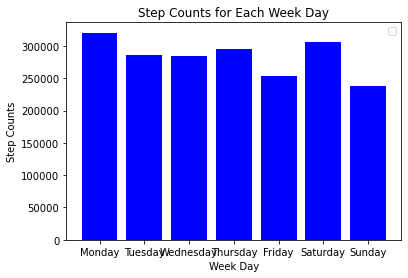

In [109]:
plt.bar(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], outcome_1["Steps"], color='b')
plt.plot()

plt.xlabel("Week Day")
plt.ylabel("Step Counts")
plt.title("Step Counts for Each Week Day")
plt.legend()
plt.show()

We can see Friday and Sunday are the two days which is relatively lower than the others. Monday is the highest one compare to others.